<a href="https://colab.research.google.com/github/MikolajKasprzyk/data_science_bootcamp/blob/main/05_uczenie_maszynowe_sklearn/09_svm_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import numpy as np
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

In [3]:
# zbior malych obrazkow z cyframi
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
images = digits.images
labels = digits.target
print(images.shape)
print(labels.shape)

(1797, 8, 8)
(1797,)


In [ ]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

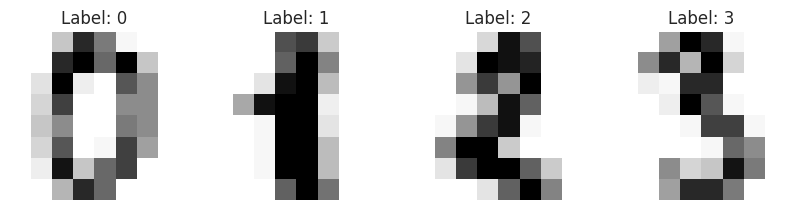

In [9]:
plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(list(zip(images, labels))[:4]):
    plt.subplot(2, 4, index +1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f'Label: {label}')

#Przygotowanie danych do modelu

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
# wypłaszczamy tablice w rzedach x train
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print()
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [13]:
X_train[0]

array([ 0.,  0.,  1.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  3., 16., 16.,
       12.,  0.,  0.,  0.,  1., 15., 16., 16., 12.,  0.,  0.,  0.,  3.,
       12., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,
        0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,  0., 11.,
       16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 13.,  7.,  0.,  0.])

In [14]:
y_train[0]

1

#Trenowanie modelu

In [15]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001)
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

#Ocena modelu

In [22]:
y_pred = classifier.predict(X_test)
# predykcje etykiet przewidzianych dla zbioru testowego
np.set_printoptions(threshold=np.inf)
print(y_pred)

[0 4 3 7 5 9 3 0 5 5 2 4 5 8 5 5 7 2 4 5 2 0 6 2 3 1 7 8 2 3 0 7 5 3 3 1 8
 4 9 6 3 6 2 4 6 4 3 2 9 4 9 2 1 8 1 0 1 9 2 3 7 9 1 3 4 9 0 3 3 5 9 0 9 3
 4 9 4 1 0 3 2 7 8 4 6 8 1 5 7 8 8 1 1 8 4 2 8 0 6 0 2 9 6 8 6 9 4 9 3 9 1
 7 2 8 6 8 0 4 4 0 3 3 4 3 0 4 3 7 5 9 5 0 2 6 7 5 6 5 9 7 2 1 1 3 2 7 5 0
 7 5 0 2 7 9 4 4 7 3 4 2 7 1 0 4 9 7 9 6 8 2 4 2 2 8 4 6 2 1 9 5 3 1 1 9 2
 2 3 1 4 3 5 0 9 0 6 0 7 3 2 9 6 7 9 1 9 0 5 4 1 9 6 9 1 3 8 6 1 4 6 7 8 4
 7 2 2 0 9 9 9 5 5 7 3 0 7 4 7 2 2 7 3 4 7 6 3 9 0 1 7 1 5 1 4 0 4 1 7 0 2
 9 0 6 1 5 2 5 8 8 6 5 9 9 0 3 9 7 0 7 0 0 5 5 6 9 2 6 5 0 6 6 2 2 2 6 2 9
 6 3 3 4 3 6 4 1 6 1 2 2 3 2 6 1 1 6 7 4 6 7 4 1 8 8 2 5 3 0 0 7 6 2 8 3 1
 2 0 7 0 7 3 7 5 6 5 2 1 1 8 9 4 7 1 1 7 2 9 8 8 4 7 6 6 1 8 9 8 5 1 1 8 0
 2 3 7 5 7 5 4 3 1 8 4 4 5 8 5 4 0 0 8 2 9 2 3 8 5 0 9 4 3 4 0 8 4 6 6 4 6
 2 2 4 2 6 4 1 2 5 2 4 8 5 8 6 7 9 0 1 4 7 9 5 2 0 6 7 1 8 3 3 1 7 6 1 5 9
 0 9 2 3 1 2]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        55
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        49
           5       0.98      0.98      0.98        41
           6       1.00      1.00      1.00        43
           7       0.98      1.00      0.99        44
           8       1.00      1.00      1.00        36
           9       0.98      0.98      0.98        46

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [24]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 45]])

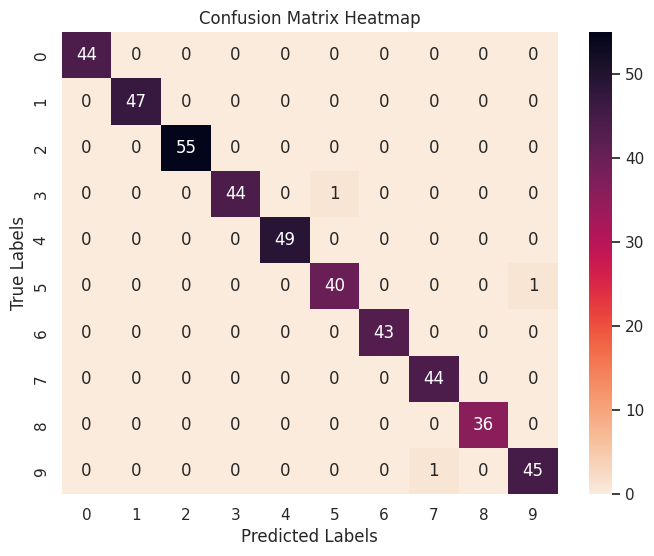

In [28]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='rocket_r')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [29]:
results = pd.DataFrame(data={'y_pred':y_pred, 'y_test':y_test})
results.head(10)

,y_pred,y_test
0,0,0
1,4,4
2,3,3
3,7,7
4,5,5
5,9,9
6,3,3
7,0,0
8,5,5
9,5,5


In [67]:
errors = results[results['y_pred'] != results['y_test']]
errors_idx = list(errors.index)
errors

,y_pred,y_test
65,9,5
248,7,9
394,5,3


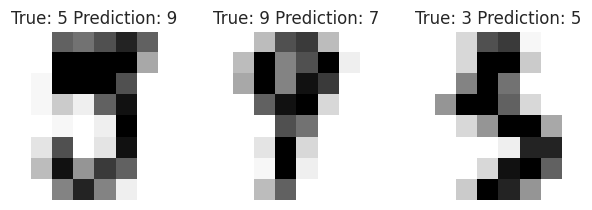

In [70]:
plt.figure(figsize=(10, 15))
for idx, error_idx in enumerate(errors_idx):
    image = X_test[error_idx].reshape(8, 8) # wczesniej zostalo to splaszczoane
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True: {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")

In [65]:
errors_idx

394

In [52]:
print(list(enumerate(errors_idx)))

[(0, 65), (1, 248), (2, 394)]
